In [5]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder

* We have loaded the necessary libraries above
* Now let's load the data

In [6]:
df = pd.read_csv("./bank-additional-full.csv", delimiter = ";")

features = ["age",
            "job",
            "marital",
            "education",
            "default",
            "housing",
            "loan",
            "contact",
            "month",
            "day_of_week",
            "campaign",
            "pdays",
            "previous",
            "poutcome",
            "emp.var.rate",
            "cons.price.idx",
            "cons.conf.idx",
            "euribor3m",
            "nr.employed"]

df[features].head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [7]:
df_copy = df.copy()
for key in features:
    df_copy[[key]] = df_copy[[key]].apply(LabelEncoder().fit_transform)
df_copy.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,39,3,1,0,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,no
1,40,7,1,3,1,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,no
2,20,7,1,3,0,2,0,1,6,1,...,0,26,0,1,8,18,16,287,8,no
3,23,0,1,1,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,no
4,39,7,1,3,0,0,2,1,6,1,...,0,26,0,1,8,18,16,287,8,no


In [8]:
outcomes=  ["y"]

df[outcomes].head()


,y
0,no
1,no
2,no
3,no
4,no


In [9]:
df_dummies = pd.get_dummies(df_copy)
print(df_dummies)

       age  job  marital  education  default  housing  loan  contact  month  \
0       39    3        1          0        0        0     0        1      6   
1       40    7        1          3        1        0     0        1      6   
2       20    7        1          3        0        2     0        1      6   
3       23    0        1          1        0        0     0        1      6   
4       39    7        1          3        0        0     2        1      6   
5       28    7        1          2        1        0     0        1      6   
6       42    0        1          5        0        0     0        1      6   
7       24    1        1          7        1        0     0        1      6   
8        7    9        2          5        0        2     0        1      6   
9        8    7        2          3        0        2     0        1      6   
10      24    1        1          7        1        0     0        1      6   
11       8    7        2          3        0        

In [10]:
del df_dummies["y_no"]
del df_dummies["duration"]
print(df_dummies)


       age  job  marital  education  default  housing  loan  contact  month  \
0       39    3        1          0        0        0     0        1      6   
1       40    7        1          3        1        0     0        1      6   
2       20    7        1          3        0        2     0        1      6   
3       23    0        1          1        0        0     0        1      6   
4       39    7        1          3        0        0     2        1      6   
5       28    7        1          2        1        0     0        1      6   
6       42    0        1          5        0        0     0        1      6   
7       24    1        1          7        1        0     0        1      6   
8        7    9        2          5        0        2     0        1      6   
9        8    7        2          3        0        2     0        1      6   
10      24    1        1          7        1        0     0        1      6   
11       8    7        2          3        0        

In [11]:

df_dummies.head


<bound method NDFrame.head of        age  job  marital  education  default  housing  loan  contact  month  \
0       39    3        1          0        0        0     0        1      6   
1       40    7        1          3        1        0     0        1      6   
2       20    7        1          3        0        2     0        1      6   
3       23    0        1          1        0        0     0        1      6   
4       39    7        1          3        0        0     2        1      6   
5       28    7        1          2        1        0     0        1      6   
6       42    0        1          5        0        0     0        1      6   
7       24    1        1          7        1        0     0        1      6   
8        7    9        2          5        0        2     0        1      6   
9        8    7        2          3        0        2     0        1      6   
10      24    1        1          7        1        0     0        1      6   
11       8    7       

In [12]:

df_dummies = df_dummies.transpose()
sns_plot = sns.distplot(df_dummies['y_yes'],bins=20, kde = False, rug = False).get_figure()

# sns.distplot(y, kde=False, rug=True)

sns_plot.savefig("histogram_y_yes.png",bbox_inches='tight')
sns_plot.savefig("histogram_y_yes.pdf",bbox_inches='tight')

KeyError: 'y_yes'

Now let's prepare the data by cleaning it up and choosing the relevant column we would like to predict

In [13]:
df_dummies = df_dummies.dropna()
outcomes_of_interest = ["y_yes"]

X_df = df_dummies[features].copy()
y_df = df_dummies[outcomes_of_interest].copy()
print(X_df)
print(y_df)


KeyError: "['age' 'job' 'marital' 'education' 'default' 'housing' 'loan' 'contact'\n 'month' 'day_of_week' 'campaign' 'pdays' 'previous' 'poutcome'\n 'emp.var.rate' 'cons.price.idx' 'cons.conf.idx' 'euribor3m' 'nr.employed'] not in index"

In [45]:
X = X_df.values
y = y_df.values.T[0]
print(X)
print(X.shape)
print(y)
print(y.shape)

[[ 39   3   1 ...  16 287   8]
 [ 40   7   1 ...  16 287   8]
 [ 20   7   1 ...  16 287   8]
 ...
 [ 39   5   1 ...   0 171   0]
 [ 27   9   1 ...   0 171   0]
 [ 57   5   1 ...   0 171   0]]
(41188, 19)
[0 0 0 ... 0 1 0]
(41188,)


We can now use the bootstrap to find an approximation of the bias and the variance

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators = 100, max_depth = 4)

#dummy_clf = DummyClassifier()
scores = cross_val_score(clf, X, y, cv=10, scoring = make_scorer(acc))

clf.fit(X,y)
#dummy_clf.fit(X,y)

print(("ACC: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std())))
print(("Dummy ACC: %0.2f")% (acc(y, clf.predict(X))))

ACC: 0.85 (+/- 0.14)
Dummy ACC: 0.90


In [49]:
df_dummies.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_yes
0,39,3,1,0,0,0,0,1,6,1,0,26,0,1,8,18,16,287,8,0
1,40,7,1,3,1,0,0,1,6,1,0,26,0,1,8,18,16,287,8,0
2,20,7,1,3,0,2,0,1,6,1,0,26,0,1,8,18,16,287,8,0
3,23,0,1,1,0,0,0,1,6,1,0,26,0,1,8,18,16,287,8,0
4,39,7,1,3,0,0,2,1,6,1,0,26,0,1,8,18,16,287,8,0


Now let's train the regressor on the whole dataset

In [52]:
clf = ExtraTreesClassifier(n_estimators = 2000,max_depth = 4)
clf.fit(X,y)

print (acc(y,clf.predict(X)))

0.898635524910168


[11 18 17 13 14 16 15  7 12  8  0  4  3 10  9  2  1  5  6]
Feature ranking:
1. pdays (0.198958)
2. nr.employed (0.187730)
3. euribor3m (0.180577)
4. poutcome (0.133142)
5. emp.var.rate (0.118867)
6. cons.conf.idx (0.047717)
7. cons.price.idx (0.041865)
8. contact (0.033529)
9. previous (0.020503)
10. month (0.017468)
11. age (0.007407)
12. default (0.006008)
13. education (0.001744)
14. campaign (0.001369)
15. day_of_week (0.001354)
16. marital (0.000764)
17. job (0.000686)
18. housing (0.000162)
19. loan (0.000150)


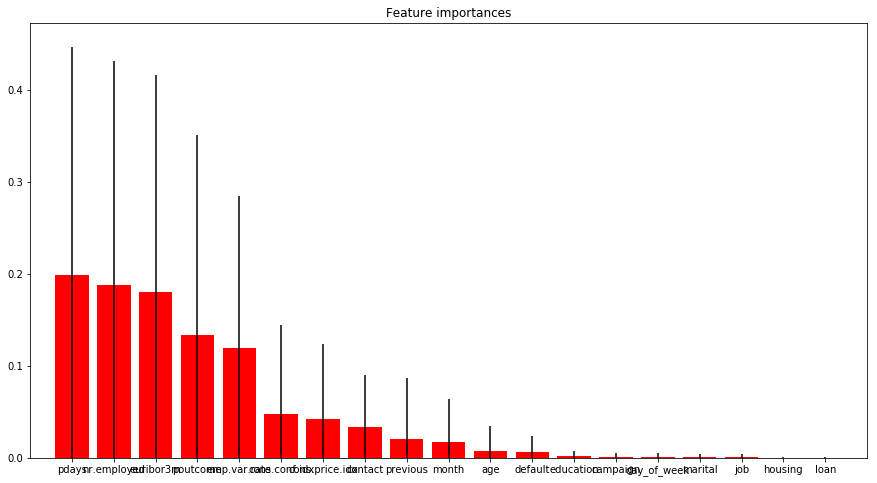

In [54]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print (indices)
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices])
plt.xlim([-1, X.shape[1]])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])

plt.savefig("importances.png",bbox_inches='tight')
plt.savefig("importances.pdf",bbox_inches='tight')

Normalized confusion matrix


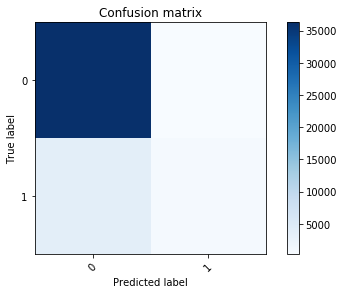

In [55]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "(%.2f)"%(cm[i, j])
        #print t
#         plt.text(j, i, t,
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
y_pred = clf.predict(X)
cnf_matrix = confusion_matrix(y, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(y))), normalize = True,
                      title='Confusion matrix')

plt.savefig("confusion.png",bbox_inches='tight')
plt.savefig("confusion.pdf",bbox_inches='tight')
